# Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import alpha_vantage

In [2]:
from alpha_vantage.timeseries import TimeSeries

# Key

In [3]:
key = open('APIkey.txt').read()

# Requirement 1 
### class ScriptData() - to fetch US Stock Data

In [4]:
ts = TimeSeries(key)

In [5]:
class ScriptData :
    def __init__(self) :
        self.data = None
        self.meta = None
        self.script_data = dict()
        self.original = None #Stores the originally fetched dataframe, before any operations on it

    def fetch_intraday_data(self, script) :
        self.script_data.setdefault(script, None)
        self.data, self.meta = ts.get_intraday(script, interval = '60min', outputsize = 'full')
        
    def convert_intraday_data(self, script) :
        #Converts The fetched time series object into a pandas dataframe.
        df = pd.DataFrame.from_dict(self.data, orient='columns')
        df = df.transpose()
        df.insert(column = 'timestamp', loc = 0, value = df.index)
        col = ['timestamp', 'open', 'high', 'low', 'close', 'volume'] # For re-defining the columns of our dataframe
        df.columns = col
        self.original = df.iloc[:, :]
        res = list()
        for i in range(len(df.index)) :
            res.append(i)
        df.index = res
        self[script] = df
        
    def __getitem__(self, script) :
        return self.script_data[script]
        
    def __contains__(self, script) :
        if script in self.script_data :
            return True
        return False
    
    def __setitem__(self, script, df) :
        self.script_data[script] = df

In [6]:
script = ScriptData()

In [7]:
script.fetch_intraday_data('GOOGL')
script.convert_intraday_data('GOOGL')
script['GOOGL']

,timestamp,open,high,low,close,volume
0,2023-02-13 20:00:00,94.2900,94.4700,94.2700,94.4000,33963
1,2023-02-13 19:00:00,94.5100,94.5300,94.2000,94.2700,36885
2,2023-02-13 18:00:00,94.5700,94.6300,94.5000,94.5100,52206
3,2023-02-13 17:00:00,94.6200,94.7000,94.4900,94.5600,2027623
4,2023-02-13 16:00:00,94.2701,94.6500,94.1000,94.6300,6317935
...,...,...,...,...,...,...
603,2022-12-19 09:00:00,90.7000,90.7161,90.2300,90.4800,25954
604,2022-12-19 08:00:00,90.6800,90.7700,90.5700,90.7200,11596
605,2022-12-19 07:00:00,90.6900,90.6900,90.5000,90.6000,6905
606,2022-12-19 06:00:00,90.4200,90.8100,90.2900,90.8100,5452


In [8]:
script.fetch_intraday_data('AAPL')
script.convert_intraday_data('AAPL')
script['AAPL']

,timestamp,open,high,low,close,volume
0,2023-02-13 20:00:00,153.7000,153.7000,153.6000,153.7000,53172
1,2023-02-13 19:00:00,153.8300,153.8400,153.6300,153.7100,24978
2,2023-02-13 18:00:00,153.7400,153.8900,153.7100,153.8000,205821
3,2023-02-13 17:00:00,153.8400,153.8500,153.6600,153.7100,2873954
4,2023-02-13 16:00:00,153.0700,153.9800,152.7600,153.8400,10885106
...,...,...,...,...,...,...
603,2022-12-19 09:00:00,135.0134,135.3609,134.1359,134.5448,315987
604,2022-12-19 08:00:00,135.1730,135.2428,134.9237,135.1032,120347
605,2022-12-19 07:00:00,135.2228,135.2428,134.9735,135.1331,28661
606,2022-12-19 06:00:00,134.9436,135.3226,134.9137,135.2428,21616


In [9]:
'GOOGL' in script

True

In [10]:
'AAPL' in script

True

In [11]:
'NVDA' in script

False

# Requirement 2
### Defining a function indicator to define the moving average on the 'close' value of the data

In [12]:
def indicator1(df, timeperiod) :
    df_new = df.iloc[:, 0 : 1] #Getting only the timestamp column from the main dataframe
    df_new.insert(loc = 1, column = 'indicator', value = df['close'].rolling(timeperiod).mean())
    return df_new

In [13]:
indicator1(script['GOOGL'], timeperiod = 5)

,timestamp,indicator
0,2023-02-13 20:00:00,NaN
1,2023-02-13 19:00:00,NaN
2,2023-02-13 18:00:00,NaN
3,2023-02-13 17:00:00,NaN
4,2023-02-13 16:00:00,94.47400
...,...,...
603,2022-12-19 09:00:00,89.64814
604,2022-12-19 08:00:00,89.98414
605,2022-12-19 07:00:00,90.26000
606,2022-12-19 06:00:00,90.44200


In [14]:
indicator1(script['AAPL'], timeperiod = 5)

,timestamp,indicator
0,2023-02-13 20:00:00,NaN
1,2023-02-13 19:00:00,NaN
2,2023-02-13 18:00:00,NaN
3,2023-02-13 17:00:00,NaN
4,2023-02-13 16:00:00,153.75200
...,...,...
603,2022-12-19 09:00:00,132.68190
604,2022-12-19 08:00:00,133.20604
605,2022-12-19 07:00:00,133.83528
606,2022-12-19 06:00:00,134.58264


# Requirement 3
### Defining a class Strategy to plot the time series graph of the recent 20 data

In [15]:
close_data_df1 = None #Used to get the signals
class Strategy :
    def __init__(self, script) :
        self.script = script
        dat = ScriptData()
        dat.fetch_intraday_data(script)
        dat.convert_intraday_data(script)
        self.df = dat[script]
        
    def get_script_data(self) :
        global close_data_df1
        close_data_df1 = indicator1(self.df, timeperiod = 5)
        self.df["close"] = self.df['close'].astype(float)
        close_data_df1.insert(loc = 2, column = 'close_data', value = self.df['close'])
        close_data_df1 = close_data_df1.dropna() #NaN values cause problem in plotting
        close_data_df = close_data_df1.iloc[0:20, :]
        close_data_df.plot(x='timestamp', y=["close_data", "indicator"], kind="line", figsize=(20, 10))
        plt.xticks(rotation = 30, ha = 'right')
        plt.show()
        
    def get_signals(self) :
        signal = []
        global close_data_df1
        for i in close_data_df1.index :
            if (close_data_df1['indicator'][i] > close_data_df1['close_data'][i]) :
                signal.append('BUY')
            else :
                signal.append('SELL')
        new_df =  close_data_df1.iloc[:, 0:1]
        new_df.insert(loc = 1, column = 'Signal', value = signal)
        return new_df

In [16]:
strat = Strategy('NVDA')

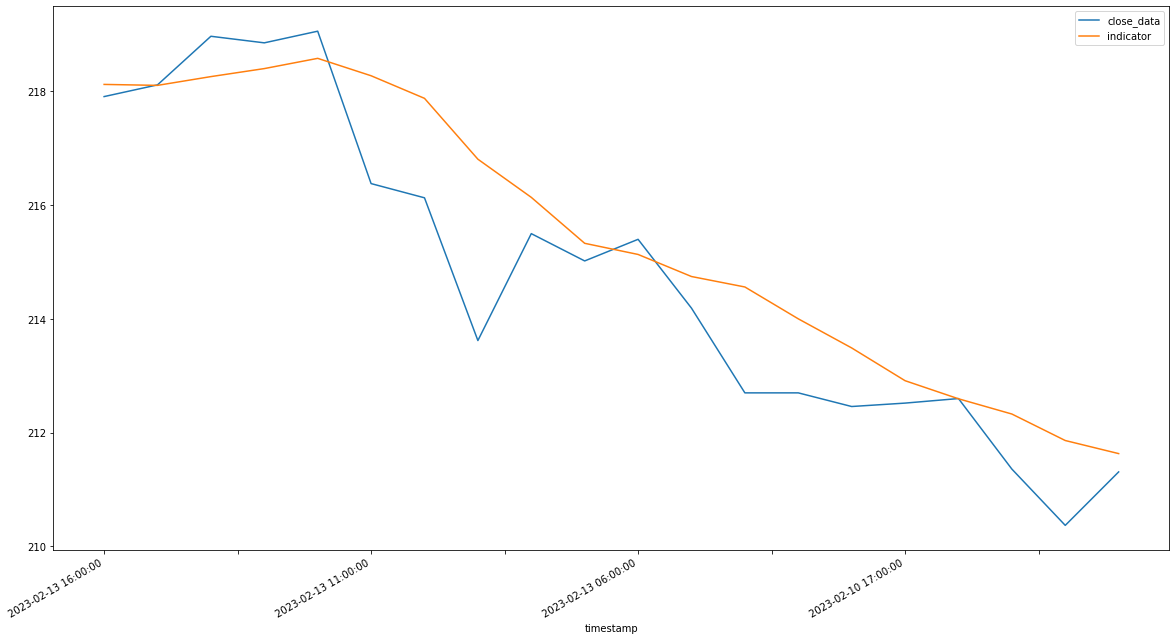

In [17]:
strat.get_script_data()

In [18]:
strat.get_signals()

,timestamp,Signal
4,2023-02-13 16:00:00,BUY
5,2023-02-13 15:00:00,SELL
6,2023-02-13 14:00:00,SELL
7,2023-02-13 13:00:00,SELL
8,2023-02-13 12:00:00,SELL
...,...,...
603,2022-12-19 09:00:00,SELL
604,2022-12-19 08:00:00,SELL
605,2022-12-19 07:00:00,SELL
606,2022-12-19 06:00:00,SELL
